##LLM Win Rate

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the raw scores of each model
LLAMA2_FT=pd.read_excel("/content/raw_scores-AZval-LlamaFT-1-25-24.xlsx")
LLAMA2_ZS=pd.read_excel("/content/raw_scores-ZS-Llama-AZval-1-25-24.xlsx")
MedAlp_ZS=pd.read_excel("/content/MedAlp-ZS-AZval-1-25-24.xlsx")
Zephyr_FT=pd.read_excel("/content/raw_scores-AZval-ZeFT-1-25-24.xlsx")
Zephyr_ZS=pd.read_excel("/content/ZeZS-raw_scores-AZval-1-25-24.xlsx")
T5_ZS=pd.read_excel("/content/raw_scores-ZS-T5-AZval-1-25-24.xlsx")

In [ ]:
# Assuming you have loaded the Excel file into the respective DataFrames, here's the code for one of the DataFrames:
# Fill NaN with 0 *Some metrics return NaN if failed.
Zephyr_FT.fillna(0, inplace=True)

# Rename the 'F1RadGraph Score' column to 'RadGraph F1'
Zephyr_FT.rename(columns={'F1RadGraph Score': 'RadGraph F1'}, inplace=True)

# Repeat the above two steps for the other DataFrames as needed
MedAlp_ZS.fillna(0, inplace=True)
MedAlp_ZS.rename(columns={'F1RadGraph Score': 'RadGraph F1'}, inplace=True)

LLAMA2_FT.fillna(0, inplace=True)
LLAMA2_FT.rename(columns={'F1RadGraph Score': 'RadGraph F1'}, inplace=True)

LLAMA2_ZS.fillna(0, inplace=True)
LLAMA2_ZS.rename(columns={'F1RadGraph Score': 'RadGraph F1'}, inplace=True)

Zephyr_ZS.fillna(0, inplace=True)
Zephyr_ZS.rename(columns={'F1RadGraph Score': 'RadGraph F1'}, inplace=True)

T5_ZS.fillna(0, inplace=True)
T5_ZS.rename(columns={'F1RadGraph Score': 'RadGraph F1'}, inplace=True)

# Display the updated DataFrame
print(Zephyr_FT)


        BLEU Score  METEOR Score  ROUGE-L Score  BERT Score  RadGraph F1
0     3.424551e-01      0.503275       0.497992    0.911323     0.447761
1     1.856392e-01      0.353185       0.222222    0.861664     0.194444
2     1.435652e-01      0.341249       0.197101    0.849389     0.208696
3     1.070568e-01      0.216213       0.159292    0.848853     0.203704
4     2.387907e-03      0.089028       0.170854    0.834909     0.094340
..             ...           ...            ...         ...          ...
995   4.387698e-02      0.211511       0.226891    0.870820     0.406780
996   1.651460e-01      0.313792       0.347458    0.873180     0.287770
997   1.514052e-01      0.262966       0.271605    0.867523     0.315789
998  2.157263e-155      0.114007       0.048000    0.835920     0.057971
999   1.448746e-01      0.388159       0.233846    0.858879     0.243243

[1000 rows x 5 columns]


In [ ]:
# Construct data matrix
# Extract the "BLEU Score" column from each DataFrame and add a "Model" column
LLAMA2_FT['Model'] = 'Llama2_FT'
LLAMA2_ZS['Model'] = 'Llama2_ZS'
MedAlp_ZS['Model'] = 'MedAlp_ZS'
Zephyr_FT['Model'] = 'Zephyr_FT'
Zephyr_ZS['Model'] = 'Zephyr_ZS'
T5_ZS['Model'] = 'T5_ZS'

# Metric to use
Score = "RadGraph F1"

# Stack the DataFrames vertically
stacked_df = pd.concat([LLAMA2_FT[[Score, 'Model']], LLAMA2_ZS[[Score, 'Model']], MedAlp_ZS[[Score, 'Model']], Zephyr_FT[[Score, 'Model']], Zephyr_ZS[[Score, 'Model']], T5_ZS[[Score, 'Model']]])

# Reset the index of the stacked DataFrame
stacked_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(stacked_df)


      RadGraph F1      Model
0        0.634615  Llama2_FT
1        0.266667  Llama2_FT
2        0.200000  Llama2_FT
3        0.400000  Llama2_FT
4        0.333333  Llama2_FT
...           ...        ...
5995     0.086957      T5_ZS
5996     0.060606      T5_ZS
5997     0.086957      T5_ZS
5998     0.109589      T5_ZS
5999     0.157895      T5_ZS

[6000 rows x 2 columns]


<ipython-input-17-677e4a0516c9>:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = combinations_df.pivot('Model1', 'Model2', f'{selected_metric} Win Rate')


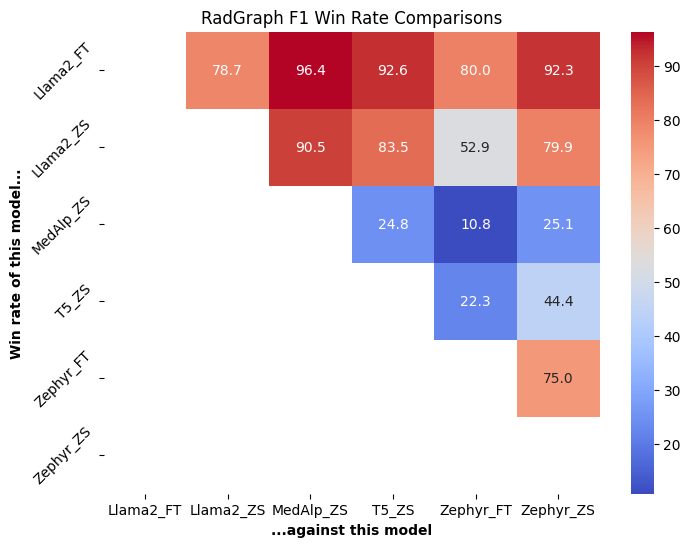

In [ ]:
# Simulated data with variations

# Define the metric you want to compare (e.g., 'BLEU Score', 'METEOR Score', etc.)
selected_metric = Score

# Create a DataFrame from the data
df = stacked_df

# Calculate the win rate percentiles for each model pair based on the selected metric
combinations = []
for model1 in df['Model'].unique():
    for model2 in df['Model'].unique():
        if model1 != model2:
            metric1 = df[df['Model'] == model1][selected_metric].values
            metric2 = df[df['Model'] == model2][selected_metric].values
            metric_win = (metric1 > metric2).mean() * 100  # Calculate the win rate as a percentile
            combinations.append([model1, model2, metric_win])

combinations_df = pd.DataFrame(combinations, columns=['Model1', 'Model2', f'{selected_metric} Win Rate'])

# Create a pivot table to prepare the data for visualization
pivot_table = combinations_df.pivot('Model1', 'Model2', f'{selected_metric} Win Rate')

# Create a mask to show only the lower corner of the heatmap
#mask = np.triu(np.ones_like(pivot_table, dtype=bool))
mask = np.tril(np.ones_like(pivot_table, dtype=bool))

# Create a color map for the color bar
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap to visualize win rate comparisons for the selected metric (lower corner only)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap=cmap, cbar=True, mask=mask)

ax.annotate("Box Font Size", xy=(-0.5, -0.5), fontsize=25)

# Change x and y-axis labels
ax.set_title(f'{selected_metric} Win Rate Comparisons')
ax.set_xlabel('...against this model', fontweight='bold')
ax.set_ylabel('Win rate of this model...',  fontweight='bold')

# Tilt the y-axis labels
plt.yticks(rotation=45)

plt.show()
